<a href="https://colab.research.google.com/github/jpauloo-git/digit_classifier_cnn/blob/main/digit_classifier_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.3449 - loss: 1.7873 - val_accuracy: 0.9920 - val_loss: 0.0786
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9300 - loss: 0.2176 - val_accuracy: 0.9940 - val_loss: 0.0158
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9672 - loss: 0.0987 - val_accuracy: 0.9960 - val_loss: 0.0118
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9784 - loss: 0.0653 - val_accuracy: 0.9980 - val_loss: 0.0077
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9839 - loss: 0.0547 - val_accuracy: 0.9976 - val_loss: 0.0073
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0439 - val_accuracy: 0.9976 - val_loss: 0.0077
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0316 - val_accuracy: 0.9976 - val_loss: 0.0072
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0291 - val_accuracy: 0

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 8, 8, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,488 (529.25 KB)

 Trainable params: 45,162 (176.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90,326 (352.84 KB)

Modelo treinado e salvo como 'digit_classifier_cnn.h5'.


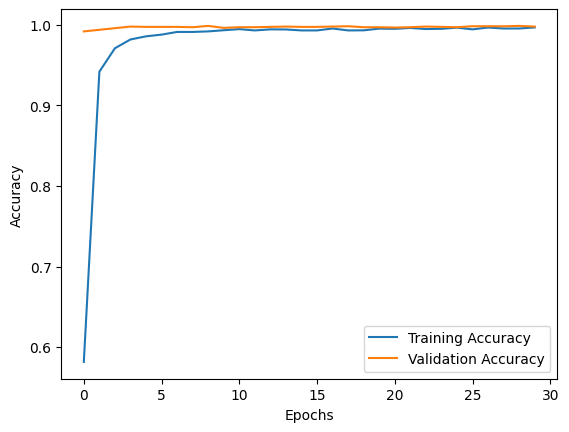

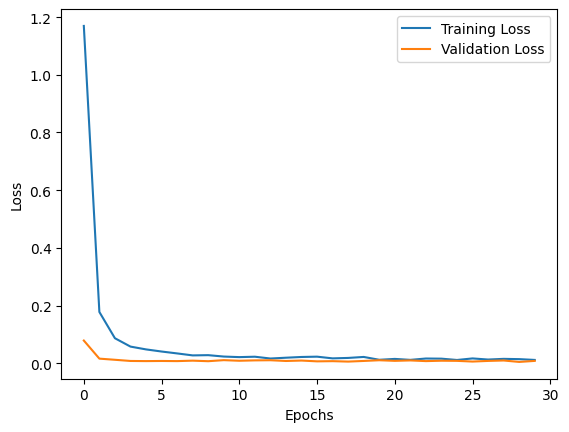

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Definindo os padrões de dígitos de 0 a 9 em uma matriz 8x8
digit_patterns = {
    0: np.array([
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0]
    ], dtype="float32"),

    1: np.array([
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]
    ], dtype="float32"),

    2: np.array([
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]
    ], dtype="float32"),

    3: np.array([
        [1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0]
    ], dtype="float32"),

    4: np.array([
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0]
    ], dtype="float32"),

    5: np.array([
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0]
    ], dtype="float32"),

    6: np.array([
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 1, 1, 1, 1, 0]
    ], dtype="float32"),

    7: np.array([
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0]
    ], dtype="float32"),

    8: np.array([
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0]
    ], dtype="float32"),

    9: np.array([
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0]
    ], dtype="float32")
}

# Função para aplicar ruído binário a uma imagem
def add_binary_noise(image, noise_level=0.025):
    noisy_image = image.copy()
    num_pixels = image.size
    num_noise_pixels = int(noise_level * num_pixels)

    # Seleciona aleatoriamente os índices dos pixels a serem invertidos
    indices = random.sample(range(num_pixels), num_noise_pixels)
    for idx in indices:
        x, y = divmod(idx, image.shape[1])
        noisy_image[x, y] = 1 - noisy_image[x, y]

    return noisy_image

# Gerar dados de treinamento
X_train = []
y_train = []

# Para cada dígito em digit_patterns, geramos múltiplas variações ruidosas
num_variations = 1000  # Aumentamos o número de variações ruidosas para cada dígito
noise_level = 0.1      # Nível de ruído (10%)

for label, digit_image in digit_patterns.items():
    for _ in range(num_variations):
        noisy_image = add_binary_noise(digit_image, noise_level=noise_level)
        X_train.append(noisy_image)
        y_train.append(label)

# Converter os dados para arrays numpy e normalizar as entradas
X_train = np.array(X_train).reshape(-1, 8, 8, 1)  # Redimensionar para o formato (N, 8, 8, 1)
y_train = to_categorical(y_train, num_classes=10)  # Converter rótulos para one-hot encoding

# Separar dados de validação
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # Construção do modelo com camadas de Dropout (SIMPLES)
# model = Sequential([
    # Conv2D(16, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    # MaxPooling2D((2, 2)),
    # Dropout(0.25),  # Dropout para evitar overfitting
    # Flatten(),
    # Dense(16, activation='relu'),
    # Dropout(0.5),
    # Dense(10, activation='softmax')  # 10 classes para os dígitos de 0 a 9
# ])

# Construção do modelo com maior complexidade e camadas adicionais de Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(8, 8, 1)),  # Primeira camada com padding='same'
    Conv2D(32, (3, 3), activation='relu', padding='same'),  # Segunda camada convolucional com padding='same'
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', padding='same'),  # Terceira camada com padding='same'
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')  # 10 classes para os dígitos de 0 a 9
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Configurar early stopping para monitorar a acurácia de validação
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

model.summary()

# Salvar o modelo treinado
model.save("digit_classifier_cnn.h5")
print("Modelo treinado e salvo como 'digit_classifier_cnn.h5'.")

# Visualização dos gráficos de perda e acurácia
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





313/313 - 1s - 2ms/step - accuracy: 0.9976 - loss: 0.0082

Test Loss: 0.0082
Test Accuracy: 0.9976
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


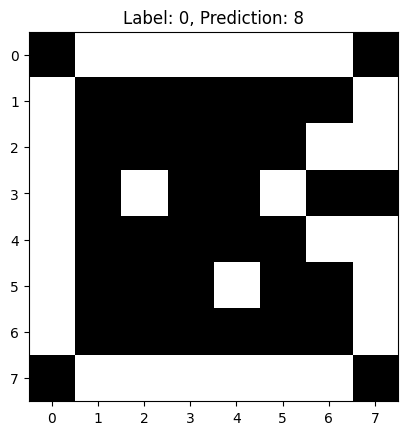

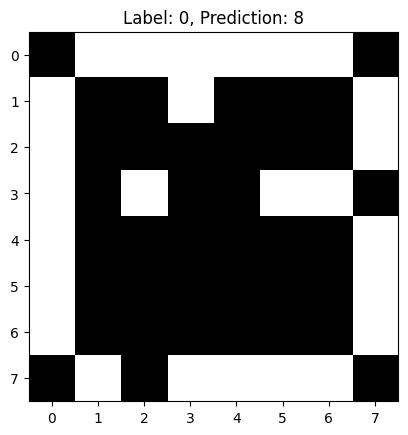

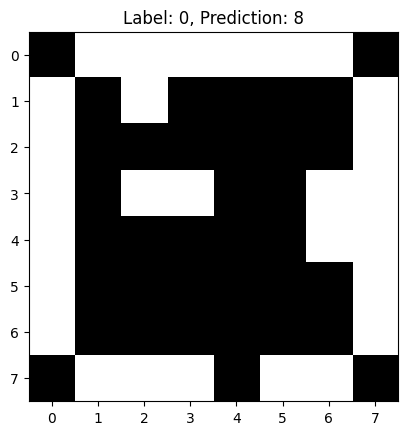

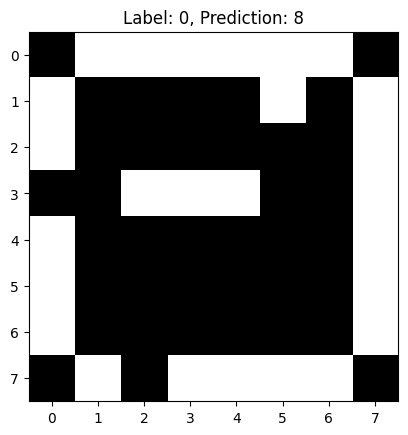

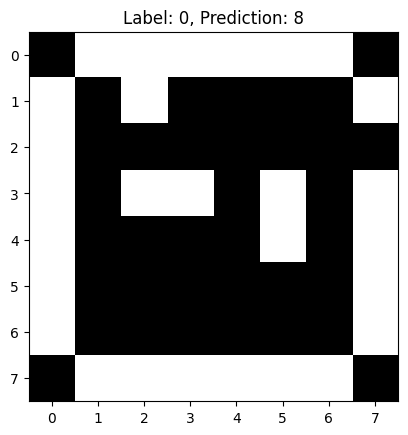

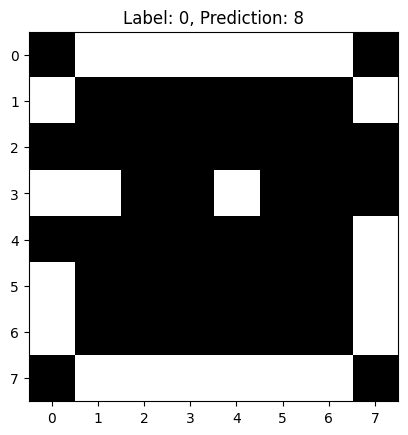

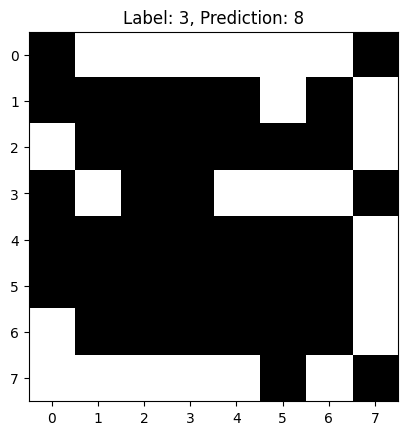

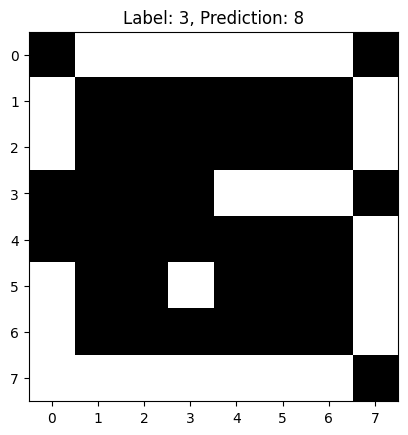

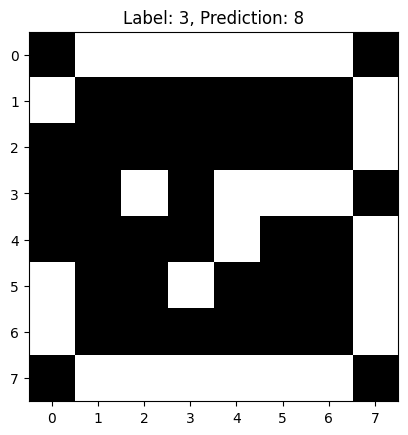

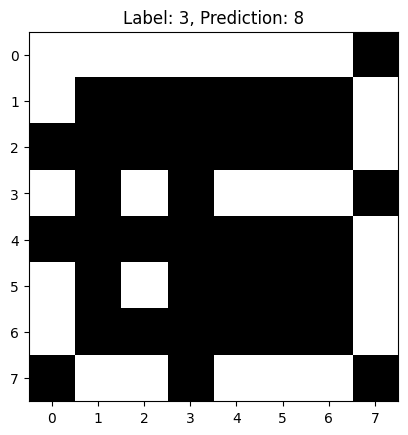

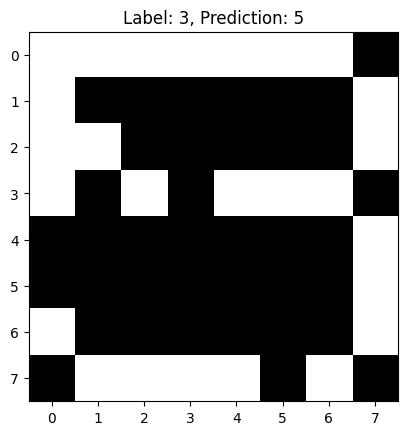

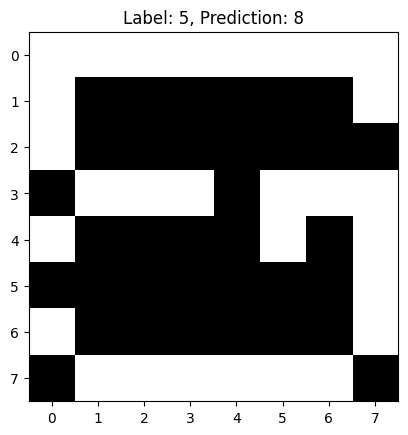

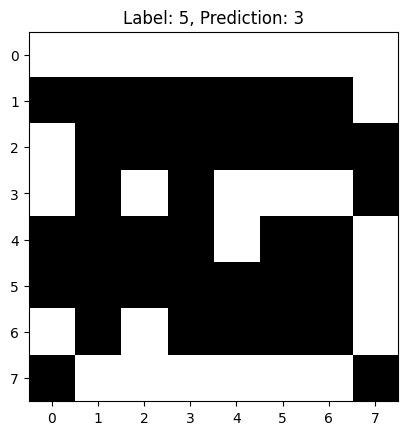

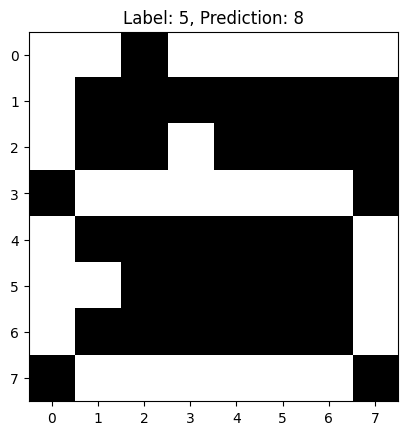

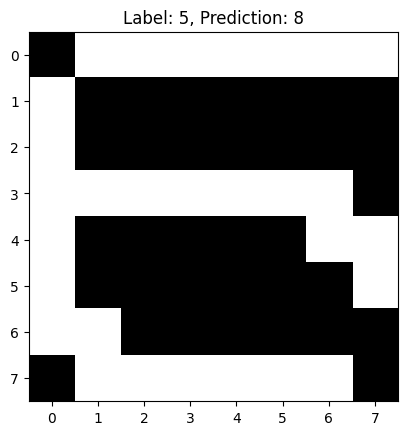

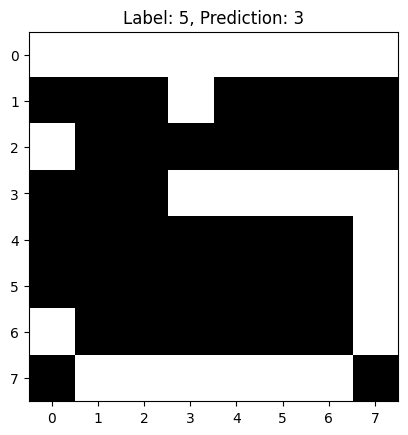

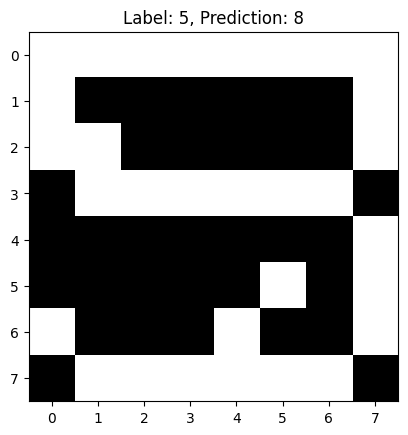

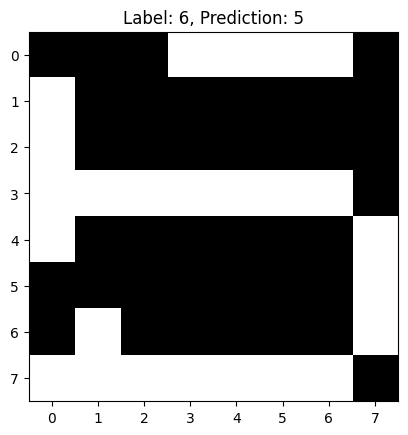

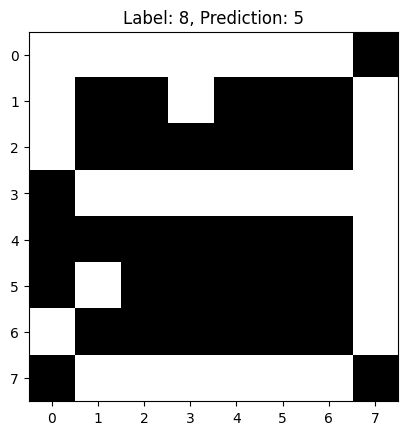

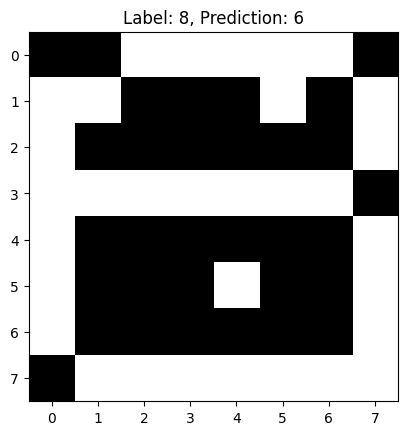

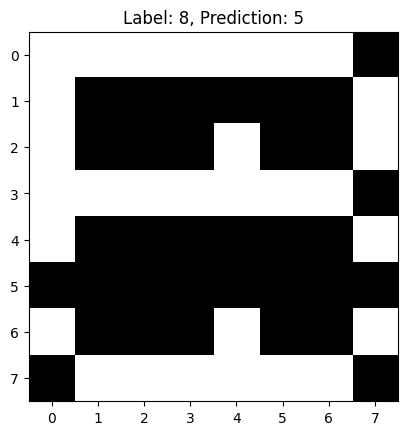

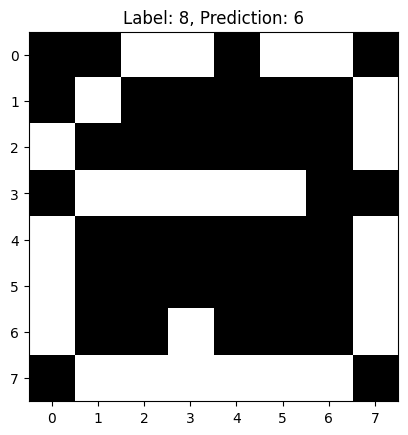

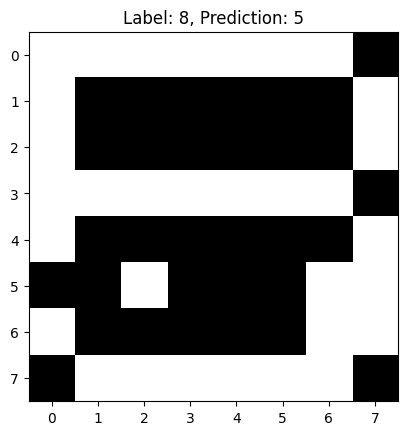

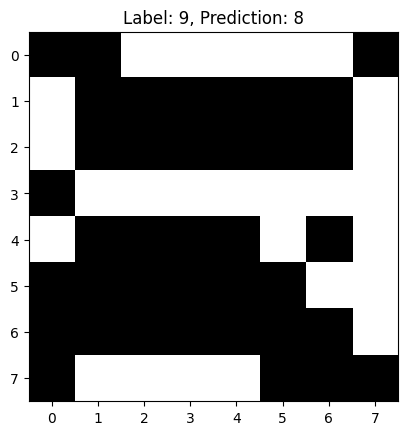

In [32]:
# Geração de dados de teste inéditos, similar ao conjunto de dados de treinamento
# Vamos gerar novos exemplos de dígitos de 0 a 9 com ruído para testar a rede
num_test_samples = 10000
x_test = []
y_test = []

for label, digit_image in digit_patterns.items():
    for _ in range(num_test_samples // 10):  # Dividir igualmente entre os 10 dígitos
        noisy_image = add_binary_noise(digit_image, noise_level=noise_level)  # Função que aplica ruído ao padrão do dígito
        x_test.append(noisy_image)
        y_test.append(label)

# Convertendo para numpy arrays e ajustando para formato de entrada da rede
x_test = np.array(x_test).reshape(-1, 8, 8, 1)  # Reshape para (n_samples, altura, largura, canais)
y_test = np.array(y_test)

# Normalizando os dados para o intervalo [0, 1]
x_test = x_test / 1.0

# Convertendo os rótulos para o formato categórico
y_test = to_categorical(y_test, num_classes=10)

# Avaliando o modelo com o conjunto de dados de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Previsão em novos exemplos de teste
predictions = model.predict(x_test)

# Visualizando algumas previsões
import matplotlib.pyplot as plt

# num_samples_to_show = 20
# for i in range(num_samples_to_show):
    # plt.imshow(x_test[i+300].reshape(8, 8), cmap='gray')
    # plt.title(f"Label: {np.argmax(y_test[i+300])}, Prediction: {np.argmax(predictions[i+300])}")
    # plt.show()

# Visualizando apenas as previsões ERRADAS! (Tive que aumentar o npumero de testes para 10 000)
for i in range(len(x_test)):
    true_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])

    # Mostra a imagem apenas se a predição estiver incorreta
    if true_label != predicted_label:
        plt.imshow(x_test[i].reshape(8, 8), cmap='gray')
        plt.title(f"Label: {true_label}, Prediction: {predicted_label}")
        plt.show()


